# Lecture 10 - Markov Chains

## L10.1 Discrete time Markov chains

We will go through a very brief introduction of discrete, finite state Markov chains. They are highly practical and can be used to describe a large number of physical, biological, economical and social phenomena.

Let´s start with the famous example of the Gamler´s ruin.

Consider a game in which on any turn you win \\$1 with probability $p=0.4$ or lose \\$1 with probability $1-p=0.6$. Also assume that you quit if your fortune reaches \\$N, and of course, also if you fortune reaches \\$0 (broke).

Let $X_n$ be the amount you have after playing the game $n$ times. Your fortune satisfies the so called Markov Property - which says that given the current state (your current fortune, $X_n = i$), any other information about the past is irrelevant when it comes to the your next step fortune, $X_{n+1}$.

$$P(X_{n+1}=i+1|X_n=i, X_{n-1}=k, ..., X_{0}=j) = P(X_{n+1}=i+1|X_n=i) = 0.4$$

We can define a discrete time Markov chain with the transition matrix $p(i,j)$ as

$$P(X_{n+1}=j|X_n=i) = p(i,j)$$

Here we have assumed that the chain is time homogeneous (the transition probabilities do not change with time).

Here is an example: the weather chain. Let $X_n$ be the weather at on day $n$ in Reykjavik, and let's assume it has three possible states: 1 = snowy, 2 = cloudy, 3 = sunny. In reality, the weather is *not* as Markov chain, but it's a good example to play with. Suppose the transition matrix is

<table>
    <tr><td>0</td><td>1</td><td>2</td><td>3</td></tr>
    <tr><td>1</td><td>0.4</td><td>0.6</td><td>0.0</td></tr>
    <tr><td>2</td><td>0.2</td><td>0.5</td><td>0.3</td></tr>
    <tr><td>3</td><td>0.1</td><td>0.7</td><td>0.2</td></tr>
</table>

Note that the sum accross a row is always 1. If you start in a state, you must end up in some state.

**Exercise:** Write dow the transition matrix for the gambler's ruin when $N=5$.

## L10.2 The Chapman-Kolmogorov equations

The transition probabilities we have covered so far refer to one step transitions, but how about $m$ step transitions? We can define the $m$ step transition probability as

$$p^m(i,j) = P(X_{n+m}=j|X_n = i)$$

Let's look the weather chain and suppose today is cloudy (2), and we want to know the probability that tomorrow will be sunny (3) and the following day it will be snowy (1). Intuitively, we expect the answer to be p(2,3)p(3,1), and this is indeed correct:

$$P(X_2 = 1, X_1 = 3| X_0 = 2) = \frac{P(X_2 = 1, X_1 = 3 , X_0 = 2)}{P(X_0 = 2)} = \frac{P(X_2 = 1, X_1 = 3 , X_0 = 2)}{P(X_1 = 3,X_0 = 2)}\frac{P(X_1 = 3 , X_0 = 2)}{P(X_0 = 2)} = P(X_2 = 1| X_1 = 3,X_0 = 2)P(X_1 = 3| X_0 = 2)$$

Now, we can bypass the middle day and ask what the full probability of it being snowy day after tomorrow if today is cloudy, and the we need to sum over all the middle steps:

$$P(X_2 = 1|X_0=2) = \sum_{k=1}^3{p(2,k)p(k,1)}$$

and in this case, the probability is 21%.

Note that what we are doing is really matrix multiplication. 

$$P(X_2 = j|X_0=i) = \sum_{k=1}^3{p(i,k)p(k,j)}$$

This leads to the conclusion that **The $m$ step transition probability is the $m$th power of the transition matrix**.

A slighly more general formulation is the **Chapman Kolmogorov's** equation

$$p^{m+n}(i,j) = \sum_k{p^m(i,k)p^n(k,j)}$$

These equations become differential equations in continuous time (backwards and forwards Kolmogorov's equations).

In order to get the two step probabilities of the a Markov chain, we just multiply the transition matrix with itself.

Now, let's return to the gambler's ruin with $N=5$.

Let's compute the two step transition probabilities:

In [1]:
import numpy as np
import pandas as pd

P = [[1, 0, 0, 0, 0, 0],
     [0.6, 0, 0.4, 0, 0, 0],
     [0, 0.6, 0, 0.4, 0, 0],
     [0, 0, 0.6, 0, 0.4, 0],
    [0, 0, 0, 0.6, 0, 0.4],
    [0, 0, 0, 0, 0, 1]]

res = np.dot(P,P)
#Print the result out nicely
cols =range(0,6)
pd.DataFrame(res, columns=cols, index=cols)

,0,1,2,3,4,5
0,1.00,0.00,0.00,0.00,0.00,0.00
1,0.60,0.24,0.00,0.16,0.00,0.00
2,0.36,0.00,0.48,0.00,0.16,0.00
3,0.00,0.36,0.00,0.48,0.00,0.16
4,0.00,0.00,0.36,0.00,0.24,0.40
5,0.00,0.00,0.00,0.00,0.00,1.00


and now the 20 step transition probabilities - gives you an idea of where you will end up...

In [2]:
#Gambler's ruin, 20 step transition probabilities
from numpy.linalg import matrix_power
res = matrix_power(P, 20)
#Print the result out nicely
cols =range(0,6)
pd.DataFrame(res, columns=cols, index=cols)

,0,1,2,3,4,5
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.919891,0.002651,0.000000,0.002859,0.000000,0.074598
2,0.803704,0.000000,0.006940,0.000000,0.002859,0.186496
3,0.629424,0.006434,0.000000,0.006940,0.000000,0.357202
4,0.377654,0.000000,0.006434,0.000000,0.002651,0.613261
5,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


What happens when the initial state is random? We may want to know what the weather is like tomorrow, but we don't know that it is today (haven't looked outside the window). Then, 

$$P(X_n=y) = \sum_x{P(X_0=x,X_n=y)} = \sum_x{P(X_0=x)P(X_n=y|X_0=x)}$$

If we define $\mu(x) = P(X_0=x)$, then we can write

$$P(X_n=y) = \sum_x{\mu(x)p^n(y,x)}$$

In words, we multiply the $n$th transition matrix on the left by the vector $\mu$. We can practice on the Weather chain.

## L10.3 State classification

Now, we look into situations when something returns to its state at a later time and define the random variable

$$T_y = min\{n \ge 1:X_n=y, X_0=y\}$$

This is the time of first return to $y$. We then define the probability that $X$ returns to $y$ as

$$g_y = P(T_y<\infty)$$

Since we have the Markov property, the probability that $X_n$ will return to $y$ two times is $g_y^2$ (it sort of restarts when it reaches the state again), and $n$ times is $g_y^n$. Now we have two possibilities:

1. $g_y < 1$: Here, the probability of return $n$ times dies out, i.e., $g_y^n \rightarrow 0$ as $n \rightarrow \infty$. A state $y$ that has $g_y < 1$ is called **transient**.

2. $g_y = 1$: The probability of return many times is always 1 since $g_y^n = 1$. A state with $g_y = 1$ is called **recurrent**.

To understand these concepts, we look at the gambler's ruin again.

In [3]:
cols =range(0,6)
pd.DataFrame(P, columns=cols, index=cols)

,0,1,2,3,4,5
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.6,0.0,0.4,0.0,0.0,0.0
2,0.0,0.6,0.0,0.4,0.0,0.0
3,0.0,0.0,0.6,0.0,0.4,0.0
4,0.0,0.0,0.0,0.6,0.0,0.4
5,0.0,0.0,0.0,0.0,0.0,1.0


The 0th state is clearly recurrent, since $p(y,y) = 1$. You will always come back to this state and in fact you will always stay there. The state is therefore called **absorbing state**. The same is true for state 5. This state is also absorbing and therefore recurrent. We can also show that the other states, 1,2,3,4 are all transient (makes sense since we will eventually either be bankrupt or hit state 5). To see this, there is a positive probability of never returning to state 1:

$$P(T_1 = \infty|X_0=1) \ge p(1,0) = 0.6 > 0$$.

I.e., there is a positive probability of goint to either of the absorbing states and get stuck there and never return. The same applies to all the other intermediate states.

This clearly relates to the situations we say earlier (after 20 steps, very low probability of being in any other state than 0 or 5). 

We will look at one more concept relating to Markov chains, but there are many more interesting things to explore in this regards. The concept is that of communication. Essentially, if you can get from state $i$ to state $j$ with positive probability, then $i$ **communicates** with $j$ and we write $i \rightarrow j$. In this case

$$\rho_{ij} = P(X_n=j \text{ for some } n>0 |X_0=i) > 0$$

In the gambler's ruin case, states 1,2,3,4 all communicate with all states in the chain, but states 0 and 5 only communcate with themselves. 

There are couple of interesting theorems that we will not prove, but state here:

If $i$ communicates with $j$ but $j$ does not communicate with $i$ then $i$ is transient.

If all states in chain (or a closed set = set that is impossible to get out of) communicate with one another, then all the states are recurrent. This is called an irreducable chain.

## L 10.4 Limit behaviour

If a chain is irreducable and aperiodic (means that $p(i,i) > 0$) then it has a limiting or stationary distribution. This means that the transition probabilities do not change. If you raise the transition matrix to a high power, you will get the limiting ditribution where all rows look the same (if it exists). It is defined by

$$\pi P = \pi$$

where $\pi$ is a row vector. One can think of this differently, by defining $\Pi$ to be a matrix where all the rows are the same. Then the equation above becomes

$$\Pi P = \Pi$$

and we we multiply with any number of $P$´s on the right, we always end up with $\Pi$.
 
Thus, we can solve this system of linear equation, when a solution exists, to get the limiting distribution. This has many important interpretations. One is that in a long time, the current state will not influence where you will be. Another is that the limiting distribution tells you the long term fraction of the time that the chain spends in each state.

The stationary distribution $\pi$ is found from solving $\pi P = \pi$. This can also be written $P^T\pi = \pi$, or $(P^T-I)\pi = 0$, and the elementwise sum of the vector $\pi$ must be 1.

Let's take a look at an example of the weather chain ($P$)

<table>
    <tr><td>0</td><td>1</td><td>2</td><td>3</td></tr>
    <tr><td>1</td><td>0.4</td><td>0.6</td><td>0.0</td></tr>
    <tr><td>2</td><td>0.2</td><td>0.5</td><td>0.3</td></tr>
    <tr><td>3</td><td>0.1</td><td>0.7</td><td>0.2</td></tr>
</table>

We can solve for the stationary distribution as follows

In [4]:
#Numerical way of solving for the transition distribution

P = np.array([[0.4, 0.6, 0.0],
     [0.2, 0.5, 0.3],
     [0.1, 0.7, 0.2]])

#Sutract the identiy matrix
A = P.T - np.identity(3)
print(A)
#Add a row of ones
A = np.append(A,[np.ones(3)],axis= 0)
print(A)
#
b = np.array([0,0,0,1]).T
print(b)
#Change one row in P.T - I to 1,1,1 and then solve it.

x = np.linalg.lstsq(A, b)[0]
print(x)
x

[[-0.6  0.2  0.1]
 [ 0.6 -0.5  0.7]
 [ 0.   0.3 -0.8]]
[[-0.6  0.2  0.1]
 [ 0.6 -0.5  0.7]
 [ 0.   0.3 -0.8]
 [ 1.   1.   1. ]]
[0 0 0 1]
[0.22352941 0.56470588 0.21176471]


C:\Users\Notandi\AppData\Local\Temp\ipykernel_21896\986356598.py:18: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x = np.linalg.lstsq(A, b)[0]


array([0.22352941, 0.56470588, 0.21176471])

In [5]:
import numpy as np
P = np.array([[0.4, 0.6, 0.0],
     [0.2, 0.5, 0.3],
     [0.1, 0.7, 0.2]])

np.linalg.matrix_power(P,100)

array([[0.22352941, 0.56470588, 0.21176471],
       [0.22352941, 0.56470588, 0.21176471],
       [0.22352941, 0.56470588, 0.21176471]])

I.e., the weather is about 22% of the time snowy, 56% of time cloudy and 21% of the time sunny.

Finally, let's look at an inventory chain example. Suppose a store sells 0, 1, 2, 3 units of its products each day with probabilities 0.3, 0.4, 0.2 and 0.1. Each night at the close of business, new units can be ordered which will be available when the store opens in the morning. Suppose the profit of a sold item is 120 but the cost of keeping it overnight is 20. We cannot sell more than 3 units a day, so our inventory will never exceed 3. Now, let's assume we adopt the 2,3 strategy, i.e., we order more units if the stock falls below 2, and we top up so that we start the new day with 3 units (hence 2,3).

Our Markov chain looks like this (state at the end of each day):

<table>
    <tr><td> </td><td>0</td><td>1</td><td>2</td><td>3</td></tr>
    <tr><td>0</td><td>0.1</td><td>0.2</td><td>0.4</td><td>0.3</td></tr>
    <tr><td>1</td><td>0.1</td><td>0.2</td><td>0.4</td><td>0.3</td></tr>
    <tr><td>2</td><td>0.1</td><td>0.2</td><td>0.4</td><td>0.3</td></tr>
    <tr><td>3</td><td>0.1</td><td>0.2</td><td>0.4</td><td>0.3</td></tr>
</table>

The stationary distribution is [0.1,0.2,0.4,0.3]. If we end the day with $k$ units, then we sold $3=k$ units and the income from the sales is $(3-k)*120$. In the long run, our daily sales will be

$$0.1*360 + 0.2*240 + 0.4*120 + 0.5*0 = 132$$

The daily costs are $k*20$:

$$0.1*0 + 0.2*20 + 0.4*40 + 0.5*60 = 38$$

The net profit is then 132 - 38 = 94.

We can also test other strategies and see which ones work best...

### Homework problems

1. Compute the four-step transition probabilities of the Weather chain, $p^4(i,j)$.

2. Three white balls and three black balls are distributed evenly in two urns (each urn always has 3 balls). At each step, one ball is chosen at random from each urn and moved to the other urn. Let $X_n$ be the number of white balls in the left urn at time n. Write up the transition matrix for $X_n$.

3. Suppose the economy can be in one of three states: high, base and low. Suppose the transition matrix between periods  is as follows

<table>
    <tr><td> </td><td>H</td><td>B</td><td>L</td></tr>
    <tr><td>H</td><td>0.9</td><td>0.1</td><td>0</td></tr>
    <tr><td>B</td><td>c</td><td>0.83</td><td>0.15</td></tr>
    <tr><td>L</td><td>0</td><td>0.05</td><td>0.95</td></tr>
</table>

(a) Find c.  (b) If we start at the base, what is the probability that we will be in the low state after two periods. (c) Find the limiting distribution of states of the economy.



https://www.probabilitycourse.com/chapter11/11_1_5_solved_probs.php

https://www.probabilitycourse.com/chapter11/11_2_7_solved_probs.php

https://www.probabilitycourse.com/chapter11/11_4_3_solved_probs.php

In [6]:
import numpy as np
P = np.array([[0.9, 0.1],
     [0.8, 0.2]])

np.linalg.matrix_power(P,40)

array([[0.88888889, 0.11111111],
       [0.88888889, 0.11111111]])

In [7]:
# 1.

P_weather = np.array([[0.4, 0.6, 0.0],
     [0.2, 0.5, 0.3],
     [0.1, 0.7, 0.2]])

ans = np.linalg.matrix_power(P_weather,4)
print(ans)
2/5 + 1/4 + 2/9 + 1/4

[[0.2278 0.5634 0.2088]
 [0.2226 0.5653 0.2121]
 [0.2215 0.5645 0.214 ]]


1.1222222222222222

In [8]:
P = np.array(        [[0.9, 0.1, 0.0],
                     [0.02, 0.83, 0.15],
                     [0, 0.05, 0.95]])

ans = np.linalg.matrix_power(P,1000)
ans

array([[0.04761905, 0.23809524, 0.71428571],
       [0.04761905, 0.23809524, 0.71428571],
       [0.04761905, 0.23809524, 0.71428571]])

In [9]:
#Sutract the identiy matrix
A = P.T - np.identity(3)
print(A)
#Add a row of ones
A = np.append(A,[np.ones(3)],axis= 0)
print(A)
#
b = np.array([0,0,0,1]).T
print(b)
#Change one row in P.T - I to 1,1,1 and then solve it.

x = np.linalg.lstsq(A, b)[0] # Ax = b leysa f x
print(x)
x

[[-0.1   0.02  0.  ]
 [ 0.1  -0.17  0.05]
 [ 0.    0.15 -0.05]]
[[-0.1   0.02  0.  ]
 [ 0.1  -0.17  0.05]
 [ 0.    0.15 -0.05]
 [ 1.    1.    1.  ]]
[0 0 0 1]
[0.04761905 0.23809524 0.71428571]


C:\Users\Notandi\AppData\Local\Temp\ipykernel_21896\3610950268.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x = np.linalg.lstsq(A, b)[0] # Ax = b leysa f x


array([0.04761905, 0.23809524, 0.71428571])

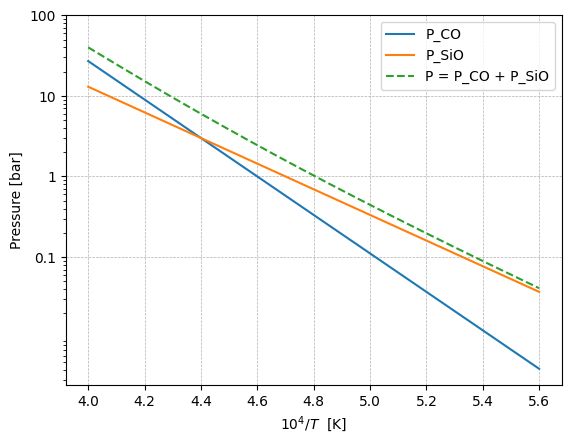

In [86]:
import numpy as np
import matplotlib.pyplot as plt

x_CO_1 = 4.4
y_CO_1 = 3

x_CO_2 = 4.6
y_CO_2 = 1

x_SiO_1 = 4.4
y_SiO_1 = 3

x_SiO_2 = 4.7
y_SiO_2 = 1

def semilog_line(x, x1, y1, x2, y2):
    m = np.log10(y2/y1)/(x2-x1)
    return y1*(10**(m*(x-x1)))

x = np.linspace(4, 5.6, 1000)

# Compute the individual lines
CO_line = semilog_line(x, x_CO_1, y_CO_1, x_CO_2, y_CO_2)
SiO_line = semilog_line(x, x_SiO_1, y_SiO_1, x_SiO_2, y_SiO_2)

# Compute the sum of the two lines
sum_line = CO_line + SiO_line

# Plot the individual lines
plt.plot(x, CO_line, label="P_CO")
plt.plot(x, SiO_line, label="P_SiO")

# Plot the sum of the two lines
plt.plot(x, sum_line, label="P = P_CO + P_SiO", linestyle='dashed')

plt.yscale('log')  # Set y-axis to logarithmic scale

# Set the yticks
yticks = [10**i for i in range(-1, 3)]  # This will give [0.1, 1, 10, 100]
plt.yticks(yticks, yticks)

plt.grid(True, linestyle='--', linewidth=0.5)
plt.xlabel("$10^4 / T $  [K]")
plt.ylabel("Pressure [bar]")
plt.legend()
plt.show()
